In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings            
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [4]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve

In [5]:
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
# Load the dataset
df = pd.read_csv("customer_churn.csv")

In [7]:
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complaints               3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [9]:
df.shape

(3150, 14)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Call Failure,3150.0,7.627937,7.263886,0.0,1.00000,6.00,12.00000,36.00
Complaints,3150.0,0.076508,0.265851,0.0,0.00000,0.00,0.00000,1.00
Subscription Length,3150.0,32.541905,8.573482,3.0,30.00000,35.00,38.00000,47.00
Charge Amount,3150.0,0.942857,1.521072,0.0,0.00000,0.00,1.00000,10.00
Seconds of Use,3150.0,4472.459683,4197.908687,0.0,1391.25000,2990.00,6478.25000,17090.00
Frequency of use,3150.0,69.460635,57.413308,0.0,27.00000,54.00,95.00000,255.00
Frequency of SMS,3150.0,73.174921,112.237560,0.0,6.00000,21.00,87.00000,522.00
Distinct Called Numbers,3150.0,23.509841,17.217337,0.0,10.00000,21.00,34.00000,97.00
Age Group,3150.0,2.826032,0.892555,1.0,2.00000,3.00,3.00000,5.00
Tariff Plan,3150.0,1.077778,0.267864,1.0,1.00000,1.00,1.00000,2.00


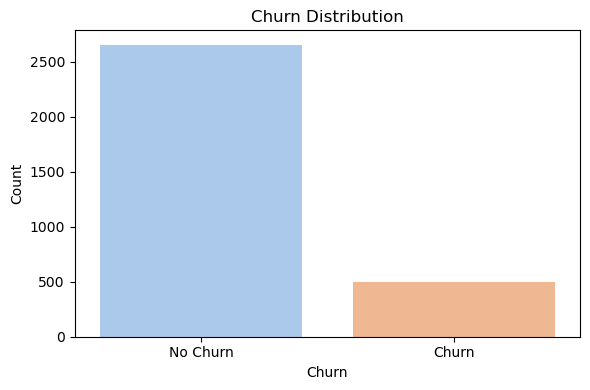

In [11]:
# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Churn Distribution')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

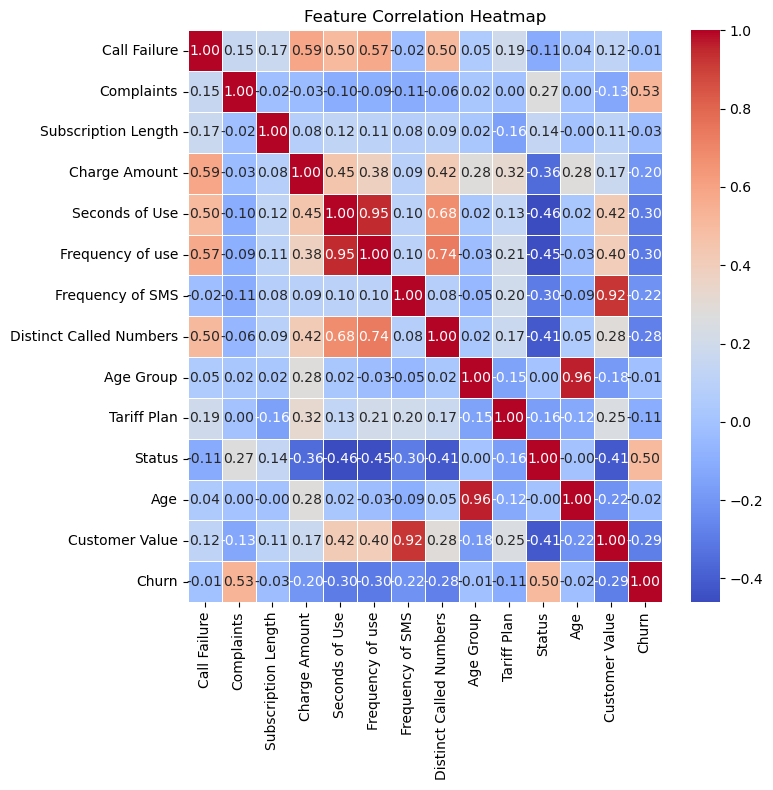

In [12]:
# Correlation heatmap
plt.figure(figsize=(8,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

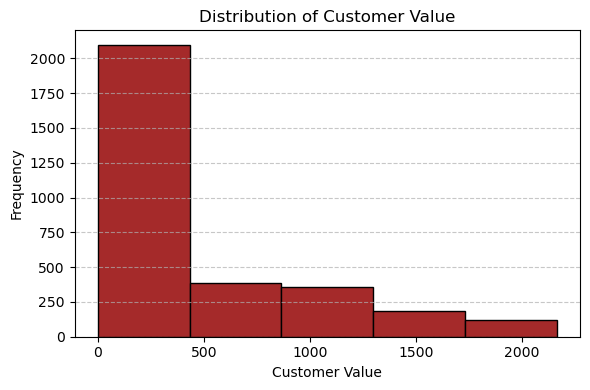

In [13]:
# Plot histogram for Customer Value
plt.figure(figsize=(6,4))
plt.hist(df['Customer Value'], bins=5, color='Brown', edgecolor='black')
plt.title('Distribution of Customer Value')
plt.xlabel('Customer Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
df.isnull().sum()

Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [15]:
df.duplicated().sum()

300

In [16]:
df=df.drop_duplicates()

In [17]:
# Features & Target
X = df.drop(columns=['Churn'])
y = df['Churn']

In [18]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

In [22]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.9298245614035088


In [23]:
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print("Decision Tree ROC AUC:", roc_auc_dt)

Decision Tree ROC AUC: 0.8536873087434886


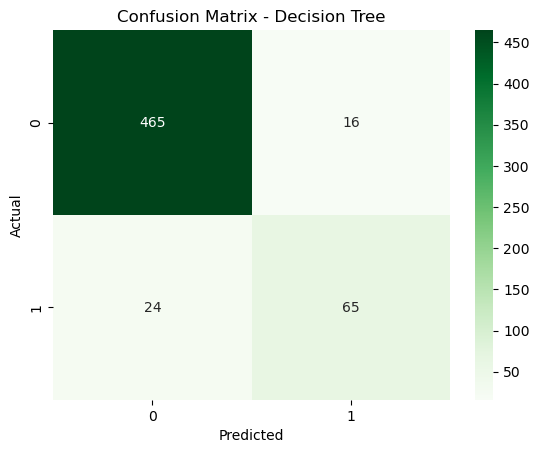

In [24]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
print("Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_dt))

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       481
           1       0.80      0.73      0.76        89

    accuracy                           0.93       570
   macro avg       0.88      0.85      0.86       570
weighted avg       0.93      0.93      0.93       570



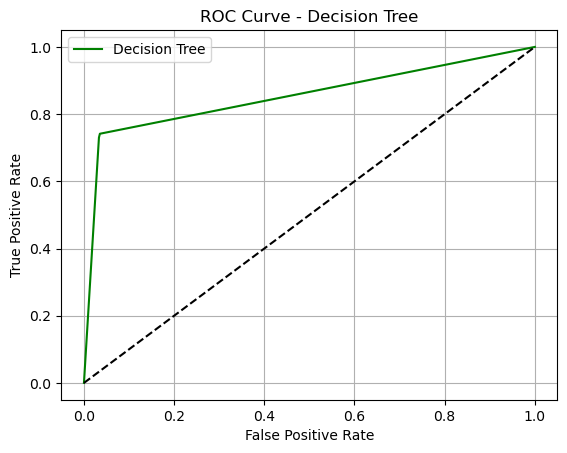

In [26]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

plt.plot(fpr_dt, tpr_dt, label='Decision Tree', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid()
plt.show()

In [27]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]

In [29]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.7157894736842105


In [30]:
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
print("Naive Bayes ROC AUC:", roc_auc_nb)

Naive Bayes ROC AUC: 0.8963535705108738


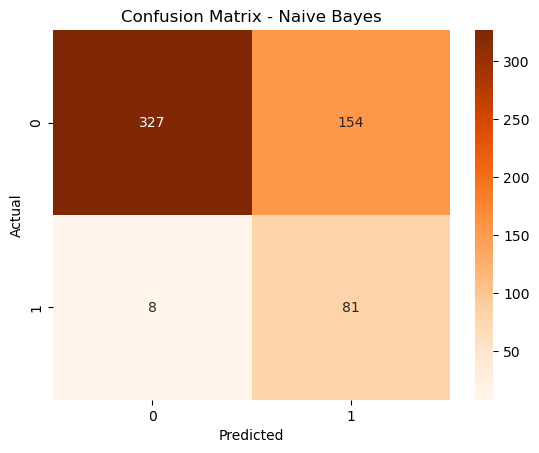

In [31]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
print("Classification Report - Naive Bayes")
print(classification_report(y_test, y_pred_nb))

Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.98      0.68      0.80       481
           1       0.34      0.91      0.50        89

    accuracy                           0.72       570
   macro avg       0.66      0.79      0.65       570
weighted avg       0.88      0.72      0.75       570



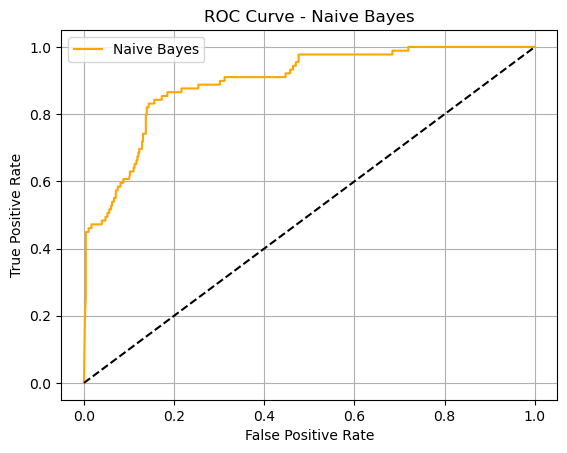

In [33]:
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)

plt.plot(fpr_nb, tpr_nb, label='Naive Bayes', color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.grid()
plt.show()

In [34]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

In [36]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.9035087719298246


In [37]:
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print("Logistic Regression ROC AUC:", roc_auc_lr)

Logistic Regression ROC AUC: 0.9268962134130673


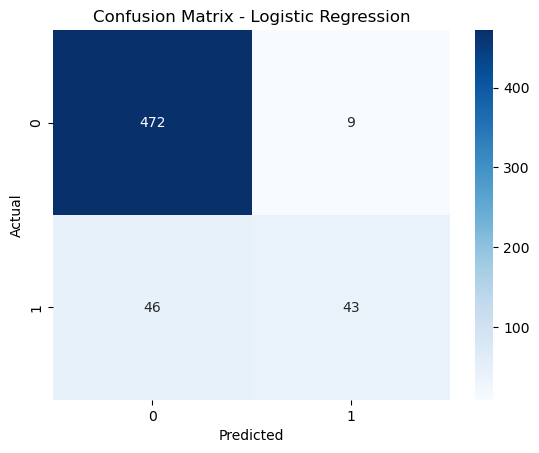

In [38]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_lr))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       481
           1       0.83      0.48      0.61        89

    accuracy                           0.90       570
   macro avg       0.87      0.73      0.78       570
weighted avg       0.90      0.90      0.89       570



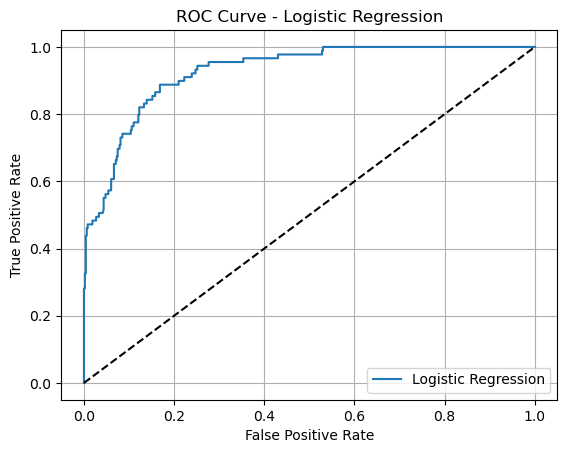

In [40]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()

In [41]:
# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [42]:
# ANN Model
ann = Sequential()
ann.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [43]:
ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
history_ann = ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7885 - loss: 0.5116 - val_accuracy: 0.9035 - val_loss: 0.2407
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8937 - loss: 0.2492 - val_accuracy: 0.9035 - val_loss: 0.2077
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8986 - loss: 0.2313 - val_accuracy: 0.9105 - val_loss: 0.1981
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9014 - loss: 0.2211 - val_accuracy: 0.9193 - val_loss: 0.1911
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9095 - loss: 0.2124 - val_accuracy: 0.9193 - val_loss: 0.1858
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9132 - loss: 0.2057 - val_accuracy: 0.9298 - val_loss: 0.1809
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9176 - loss: 0.1989 - val_accuracy: 0.9298 - val_loss: 0.1757
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9226 - loss: 0.1916 - val_accuracy: 0.9281 - val_loss

In [45]:
# ANN Predictions
y_proba_ann = ann.predict(X_test).ravel()
y_pred_ann = (y_proba_ann >= 0.5).astype(int)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [46]:
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy_ann)

ANN Accuracy: 0.9333333333333333


In [47]:
roc_auc_ann = roc_auc_score(y_test, y_proba_ann)
print("ANN ROC AUC:", roc_auc_ann)

ANN ROC AUC: 0.9689668060454578


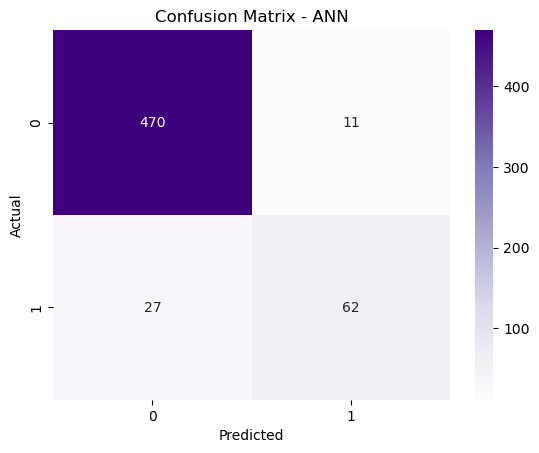

In [48]:
# Confusion Matrix - ANN
cm_ann = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("Classification Report - ANN")
print(classification_report(y_test, y_pred_lr))

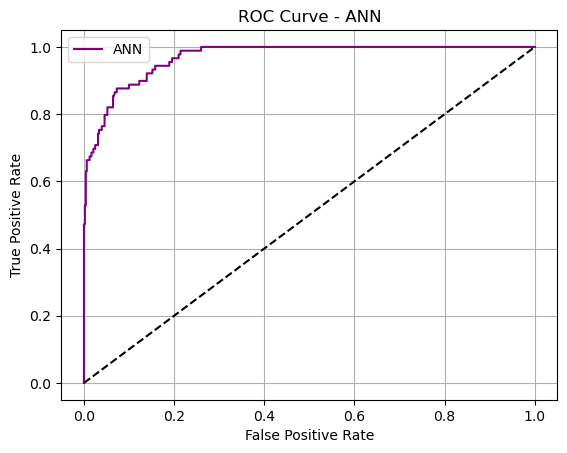

In [49]:
# ROC Curve - ANN
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_proba_ann)
plt.plot(fpr_ann, tpr_ann, label='ANN', color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN')
plt.legend()
plt.grid()
plt.show()

In [50]:
# Comparison
data_model_Evaluation = [ ['Decision Tree', accuracy_dt, roc_auc_dt],
       ['Naive Bayes',accuracy_nb, roc_auc_nb],
       ['Logistic Regression', accuracy_lr, roc_auc_lr],['ANN', accuracy_ann, roc_auc_ann]]
df_model_Evaluation = pd.DataFrame(data_model_Evaluation, columns=['Algorithm Name', 'Accuracy', "ROC AUC"])

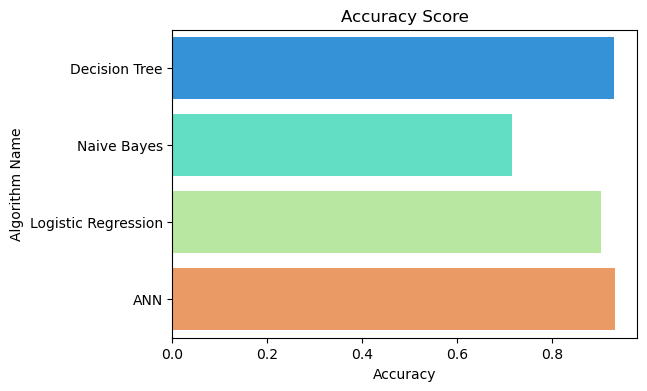

In [51]:
plt.figure(figsize=(6,4))
sns.barplot(x='Accuracy', y='Algorithm Name', data = df_model_Evaluation,  palette='rainbow')
plt.title('Accuracy Score')
plt.show()

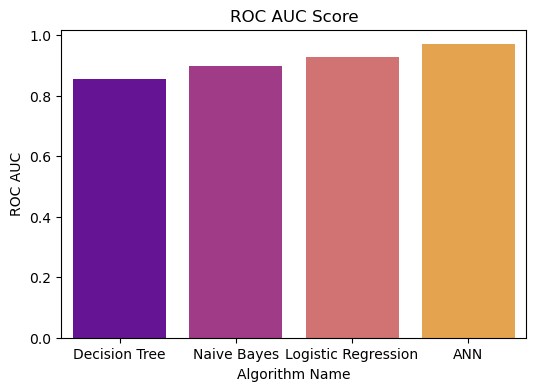

In [52]:
plt.figure(figsize=(6,4))
sns.barplot(x='Algorithm Name', y='ROC AUC', data = df_model_Evaluation,  palette='plasma')
plt.title('ROC AUC Score')
plt.show()